### Autograd
Autograd can automatically differentiate native Python and Numpy code. It can handle a large subset of Python's features, including loops, ifs, recursion and closures, and it can even take derivatives of derivatives of derivatives. The main intended application of Autograd is gradient-based optimization.

In [1]:
# Import required libraries
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sn
style.use('ggplot')
%matplotlib inline

In [2]:
def f(x):
    # f(x) = x^3 + x^2 + 1
    result = np.power(x, 3) + np.power(x, 2) + 1
    return result
f(4.0)

81.0

In [3]:
# First order derivative
df = grad(f)
df(4.0)

56.0

Autograd's <b>grad</b> function takes in a function, and gives you a function that computes its derivative. Your function must have a scalar-valued output (i.e. a float).

In [4]:
# Second order derivative
d2f = grad(df)
d2f(4.0)

26.0

In [5]:
d3f = grad(d2f)
d3f(4.0)

6.0

#### Plot the graph

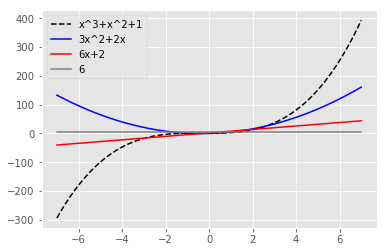

In [6]:
from autograd import elementwise_grad as egrad
x = np.linspace(start = -7.0, stop = 7.0, num = 200)
y = []
first_dev = []
second_dev = []
third_dev = []
for i in range(0, len(x)):
    y.append(f(x[i]))
    first_dev.append(df(x[i]))
    second_dev.append(d2f(x[i]))
    third_dev.append(d3f(x[i]))
    



plt.plot(x, y, c='k', linestyle='--', label="x^3+x^2+1")
plt.plot(x, first_dev, c='blue', label="3x^2+2x")
plt.plot(x, second_dev, c='red', label="6x+2")
plt.plot(x, third_dev, c='grey', label="6")

plt.legend(loc="best")
plt.show()

We can continue to differentiate as many times as we like. This can be explained with the below mentioned example.

In [8]:
from autograd import elementwise_grad as egrad # for functions that vectorize over inputs
def tanh(x):
    y = np.exp(-2 * x)
    return ((1 - y)/(1 + y))

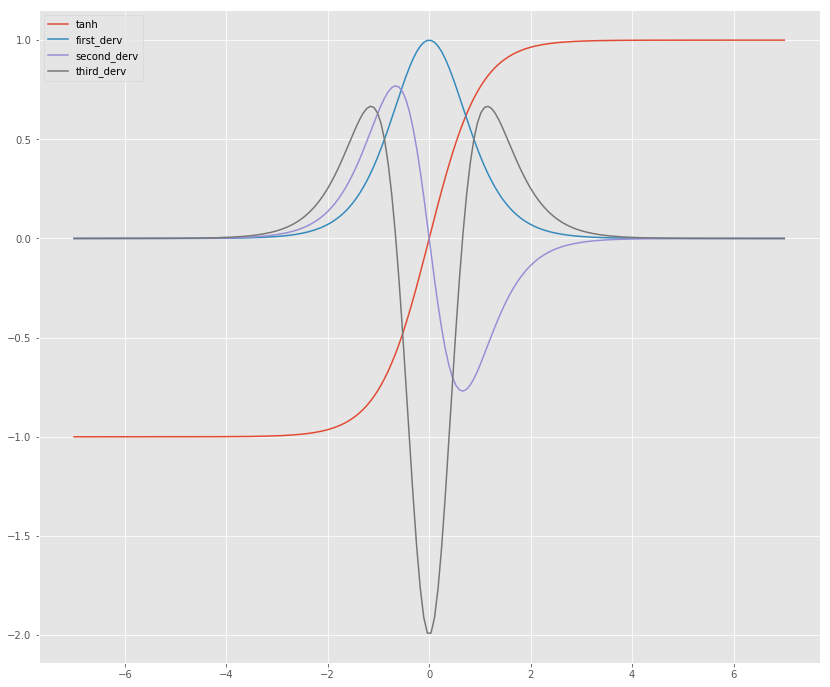

In [20]:
# plot the graph
plt.figure(figsize=(14, 12))
plt.plot(x, tanh(x), label="tanh")
plt.plot(x, egrad(tanh)(x), label="first_derv")
plt.plot(x, egrad(egrad(tanh))(x), label="second_derv")
plt.plot(x, egrad(egrad(egrad(tanh)))(x), label="third_derv")
plt.legend(loc="best")
plt.show()

#### Note:

Whenever you are working on any machine learning model, you create a loss function that let you know how well your model performing and you optimize that loss function with respect to the model parameters. This is the time when you need gradient.

Given a function made up of several nested function calls, there are several ways to compute it's derivative. For e.g., given L(x) = F(G(H(x))), the chain rule says that its gradient is dL/dx = dF/dG * dG/dH * dH/dx. If we eveluate this product from right-to-left: (df/dG * (dG/dH * dH/dx)), the same order as the computations themselves were performed, this is called <i>forward-mode differentiation</i>. If we evalute this product from left-to-right: (dF/dG * dG/dH) * dH/dx)), the reverse order as the computations themselves were performed, this is called <i>reverse-mode differentiation</i>.

Compared to finite differences or forward-mode, reverse-mode differentiation is by far the more practical method for differentiating functions that take in a large vector and output a single number. In the machine learning community, reverse-mode differentiation is known as <i>backpropagation</i>, since the gradients propogate backwards through the function.

Tensorflow uses automatic differentiation and more specifically reverse-mode auto differentiation. There are three popular methods to calculate the derivatives:
* Numerical differentiation
* Symbolic differentiation
* Automatic differentiation

An <i>automatic differentiation</i> may be think of <i>differentiation by finite differences</i>, where you approximate derivative of f(x) as [f(x+e) - f(x-e)]/(2e). An automatic differentiation is different and the finite difference method is an example of "numerical differentiation". Finite difference method is not practical for high dimensional problems.